# Basic Q-Learning Algorithms
In this exercise we are going be exploring a family of RL algorithms called Q-Learning algorithms. You will begin by implementing a simple lookup-table version of the algorithm, and then a neural-network equivalent using Tensorflow.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

## OpenAI Gym Environment
For this exercise we will use the [FrozenLake](https://gym.openai.com/envs/FrozenLake-v0) environment from the [OpenAI gym](https://gym.openai.com) as a toy example. For those unfamiliar, the OpenAI gym provides an easy way for people to experiment with their learning agents in an array of provided toy games. The FrozenLake environment consists of a `4 x 4` grid of blocks, each one either being the start block `S`, the goal block `G`, a safe frozen block `F`, or a dangerous hole `H`. The objective is to have an agent learn to navigate from the start to the goal without moving onto a hole. At any given time the agent can choose to move either up, down, left, or right. The catch is that there is a wind which occasionally blows the agent onto a space they didn’t choose. As such, perfect performance every time is impossible, but learning to avoid the holes and reach the goal are certainly still doable. The reward at every step is 0, except for entering the goal, which provides a reward of 1. Thus, we will need an algorithm that learns long-term expected rewards. This is exactly what Q-Learning is designed to provide.

## Install OpenAI Gym
To install the OpenAI gym, simply use  `pip install gym`  to grab it.

In [2]:
!pip install gym

## Load the environment

In [3]:
!pip3 install gym

In [4]:
import gym
env = gym.make('FrozenLake-v0')

For more information, please refer to [OpenAI documentation](https://gym.openai.com/docs)

## Part 1 - Q-Table learning algorithm
In it’s simplest implementation, Q-Learning is a table of values for every state (row) and action (column) possible in the environment. Within each cell of the table, we learn a value for how good it is to take a given action within a given state. In the case of the FrozenLake environment, we have 16 possible states (one for each block), and 4 possible actions (the four directions of movement), giving us a 16 x 4 table of Q-values. We start by initializing the table to be uniform (all zeros), and then as we observe the rewards we obtain for various actions, we update the table accordingly.

We make updates to our Q-table using something called the [Bellman equation](https://en.wikipedia.org/wiki/Bellman_equation), which states that the expected long-term reward for a given action is equal to the immediate reward from the current action combined with the expected reward from the best future action taken at the following state. In equation form, the rule looks like this (Equation 1):
$$ Q(s,a) = r + γ(\max(Q(s’,a’)) $$

This says that the Q-value for a given state ($s$) and action ($a$) should represent the current reward ($r$) plus the maximum discounted ($\lambda$) future reward expected according to our own table for the next state ($s'$) we would end up in.

In [14]:
#Initialize table, with states as rows and actions (up, down, left, or right) as columns 
Q = np.zeros([env.observation_space.n,env.action_space.n])
#Set learning parameters
lr = .8
#Set discounted factor
y = .95
num_episodes = 2000
#create lists to contain total rewards and steps per episode
rList = []
for i in range(num_episodes):
    #Reset environment and get first new observation
    s = env.reset()
    #Total reward in one episode
    rAll = 0
    d = False
    j = 0
    while j < 99:
        j+=1
        ###############################################################################
        # TODO: Implement the Q-Table learning algorithm.                             #
        # You will need to do the following:                                          #
        # (1) Choose an action by greedily (with noise) picking from Q table given s  #
        #     as input.                                                               #
        # (2) Get new state s1, reward r and done d from environment                  #
        # (3) Update Q-Table with new knowledge.                                      #
        # (4) Cumulate the total reward rAll                                          #
        # (5) Update s                                                                #
        # Note: You may use the gym interfaces env.action_space, env.step etc.        #
        #       E.g. observation, reward, done, info = env.step(action)               #
        #       Please refer to the docs for more information.                        #
        #       For (1), consider adding noise as a mean of encouraging exploration.  #
        #       For (3), calculate the new target Q-value using Bellman equation.     #
        #       Instead of directly updating toward it, we take a small step in the   #
        #       direction that will make the Q value closer to the target, i.e. use   #
        #       learning rate that controls how much of the difference between        #
        #       newly proposed Q-value and previous Q-value                           #
        ###############################################################################
        
        # greedily picking with noise
        a = np.argmax(Q[s,:] + np.random.rand(1, env.action_space.n) * (1.0 / (i+1)))
        # get new state
        s1, r, d, info = env.step(a)
        # update Q-Table
        Q[s, a] = Q[s, a] + lr * (r + y * np.max(Q[s1,:]) - Q[s, a])
        # update total
        rAll += r
        # update s
        s = s1
        
        ##############################################################################
        #                             END OF YOUR CODE                               #
        ##############################################################################
        
        #end of one episode
        if d == True:
            break
    rList.append(rAll)

The score is around 0.5 after 2000 episodes.

In [15]:
print("Score over time: " +  str(sum(rList)/num_episodes))

Score over time: 0.487


In [16]:
print("Final Q-Table Values")
print(Q)

Final Q-Table Values
[[  2.00983707e-01   3.79768356e-03   3.95747842e-03   3.91785540e-03]
 [  5.94199860e-04   3.26368464e-04   3.67826681e-04   2.49051716e-01]
 [  1.41930492e-03   1.24413617e-03   2.00829915e-03   2.05978764e-01]
 [  7.58636382e-04   0.00000000e+00   1.12612208e-04   6.28666386e-02]
 [  2.08601787e-01   6.38280817e-05   6.70849303e-04   2.45883808e-05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  7.64780462e-02   3.27265855e-05   1.10050220e-05   9.94566965e-06]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   2.58010172e-04   0.00000000e+00   1.97767786e-01]
 [  7.63965111e-05   4.31673970e-01   2.25174630e-04   1.31468755e-03]
 [  5.09125437e-02   0.00000000e+00   2.72969144e-04   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   2.76329530e-04   5.75363888e-01   3

In [17]:
# print out the 4 x 4 grid and the current position of the agent
env.render()

  (Up)
SFFF
FHFH
FFFH
HFFG


## Inline Question 1:
In TODO(3), why not directly apply the Bellman equation for updating the Q value? (in this case lr = 1 and why?)

**Your answer:** If we apply the Bellman equation for updating the Q value directly (lr = 1), the total reward is actually quite low, because the learning rate determines the what extent the newly acquired information will override the old information and if lr = 1, it means that the newly information fully determines the state and let the agent only consider the most recent case, but actually due to the model itself with several possible conditions at one state, it is not fully deterministic and it can not only dependent on the most recent information.

## Inline Question 2:
An optimal Q table will tell you the true expected discounted reward for any action given any state. If you find the maximum value of the learned table is not what you believe it should be, do you think it still make sense? Explain briefly.**

**Your answer:** Yes, I think it still makes sense. The optimal Q table will return the true expected reward for any action given any state, but it does not mean that the maximum value of the learned table is the result of all true expected discounted reward. The optimal Q table may return the maximum reward, which may do not meet the true expectation at some actions given some states. Therefore, there may exist conflicts but it still makes sense.

## Part 2 - Q-Network Approach
While it is easy to have a 16x4 table for a simple grid world, the number of possible states in any modern game or real-world environment is nearly infinitely larger. For most interesting problems, tables simply don’t work. We instead need some way to take a description of our state, and produce Q-values for actions without a table: that is where neural networks come in. By acting as a function approximator, we can take any number of possible states that can be represented as a vector and learn to map them to Q-values.

In the case of the FrozenLake example, we will be using a one-layer network which takes the state encoded in a one-hot vector `(1x16)`, and produces a vector of 4 Q-values, one for each action. Such a simple network acts kind of like a glorified table, with the network weights serving as the old cells. The key difference is that we can easily expand the Tensorflow network with added layers, activation functions, and different input types, whereas all that is impossible with a regular table. The method of updating is a little different as well. Instead of directly updating our table, with a network we will be using backpropagation and a loss function. Our loss function will be sum-of-squares loss, where the difference between the current predicted Q-values, and the “target” value is computed and the gradients passed through the network. **In this case, our Q-target value for the chosen action is the equivalent to the Q-value computed in equation 1 above.**

### Implementing the network itself

In [18]:
import tensorflow as tf
env = gym.make('FrozenLake-v0')
tf.reset_default_graph()

In [19]:
#These lines establish the feed-forward part of the network used to choose actions
inputs1 = tf.placeholder(shape=[1,16],dtype=tf.float32)
W = tf.Variable(tf.random_uniform([16,4],0,0.01))
Qout = tf.matmul(inputs1,W)
predict = tf.argmax(Qout,1)

#Below we obtain the loss by taking the sum of squares difference between the target and prediction Q values.
nextQ = tf.placeholder(shape=[1,4],dtype=tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
updateModel = trainer.minimize(loss)

### Training the network

In [ ]:
init = tf.global_variables_initializer()

# Set learning parameters
#discounted factor
y = .99
#chance of random action
e = 0.1
num_episodes = 2000
#create lists to contain total rewards and steps per episode
jList = []
rList = []
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        #Reset environment and get first new observation
        s = env.reset()
        #Total reward in one episode
        rAll = 0
        d = False
        j = 0
        #The Q-Network
        while j < 99:
            j+=1
            
            ###############################################################################
            # TODO: Implement the Q-network approach.                                     #
            # You will need to do the following:                                          #
            # (1) Choose an action by greedily (with e chance of random action, e=0.1)    # 
            #     from the Q-network                                                      #
            # (2) Get new state s1, reward r and done d from environment                  #
            # (3) Obtain the Q' values by feeding the new state through our network       # 
            # (4) Obtain maxQ' and set our target value for chosen action.                #
            # (5) Train our network using target and predicted Q values                   #
            # (6) Cumulate the total reward rAll                                          #
            # (7) Update observation s                                                    #
            # Note: In (1) we need to feed a one-hot vector encoding the state space to   # 
            #       our network. The environment represents the position in the grid-     #
            #       world as a number between 0 and 15, e.g. if s=11, the one-hot vector  #
            #       (here is inputs1) should be                                           #
            #       [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]]   #
            ###############################################################################
            
            # choose an action by greedily, with e = 0.1
            a, aQ = sess.run([predict, Qout], feed_dict={inputs1: np.identity(16)[s: s + 1]})
            # with e change of random action
            # print(a)
            # print(aQ)
            if np.random.rand(1) < e: 
                a[0] = env.action_space.sample()
            
            # get new state s1, reward r and done d from env
            s1, r, d, info = env.step(a[0])
            
            # obtain the Q' values by feeding the new state through the network
            Q_ = sess.run(Qout, feed_dict={inputs1: np.identity(16)[s1: s1 + 1]})
            
            # Obtain MaxQ_ and set our target value for chosen action
            MaxQ_ = np.max(Q_)
            
            # Set target action
            tQ = aQ
            tQ[0, a[0]] = r + y * MaxQ_
            
            # Train te network
            noinfo, W_ = sess.run([updateModel, W], feed_dict={inputs1: np.identity(16)[s: s + 1], nextQ: tQ})
            
            # cumulate the total reward
            rAll += r
            
            # update s
            s = s1
            
            
            ##############################################################################
            #                             END OF YOUR CODE                               #
            ##############################################################################
            
            if d == True:
                #Reduce chance of random action as we train the model.
                e = 1./((i/50) + 10)
                break
        jList.append(j)
        rList.append(rAll)
        if len(rList) % 10 == 0:
            print("Episode",i,"reward:",np.mean(rList[-10:]))
print("Percent of succesful episodes: " + str(sum(rList)/num_episodes) + "%")

Episode 9 reward: 0.0
Episode 19 reward: 0.1
Episode 29 reward: 0.1
Episode 39 reward: 0.0
Episode 49 reward: 0.0
Episode 59 reward: 0.1
Episode 69 reward: 0.0
Episode 79 reward: 0.1
Episode 89 reward: 0.0
Episode 99 reward: 0.1
Episode 109 reward: 0.0
Episode 119 reward: 0.4
Episode 129 reward: 0.1
Episode 139 reward: 0.1
Episode 149 reward: 0.0
Episode 159 reward: 0.0
Episode 169 reward: 0.0
Episode 179 reward: 0.1
Episode 189 reward: 0.0
Episode 199 reward: 0.4
Episode 209 reward: 0.5
Episode 219 reward: 0.8
Episode 229 reward: 0.4
Episode 239 reward: 0.2
Episode 249 reward: 0.2
Episode 259 reward: 0.5
Episode 269 reward: 0.2
Episode 279 reward: 0.5
Episode 289 reward: 0.4
Episode 299 reward: 0.6
Episode 309 reward: 0.4
Episode 319 reward: 0.5
Episode 329 reward: 0.3
Episode 339 reward: 0.5
Episode 349 reward: 0.4
Episode 359 reward: 0.4
Episode 369 reward: 0.4
Episode 379 reward: 0.5
Episode 389 reward: 0.5
Episode 399 reward: 0.3
Episode 409 reward: 0.5
Episode 419 reward: 0.3
Epi

### Some statistics on network performance

We can see that the network beings to consistly reach the goal around the 750 episode mark.

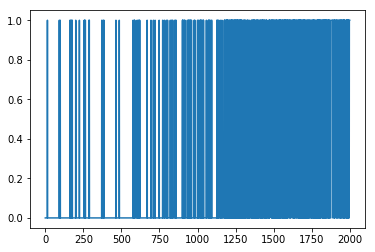

In [12]:
plt.plot(rList)

It also begins to progress through the environment for longer than chance around the 750 mark as well.

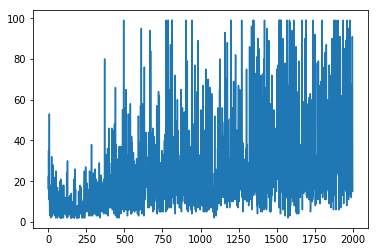

In [13]:
plt.plot(jList)

While the network learns to solve the FrozenLake problem, it turns out it doesn’t do so quite as efficiently as the Q-Table. While neural networks allow for greater flexibility, they do so at the cost of stability when it comes to Q-Learning. There are a number of possible extensions to our simple Q-Network which allow for greater performance and more robust learning. we will be exploring those additions in Exercise 2.